In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [2]:
!pip install pandas alpha_vantage scikit-learn matplotlib

API: S2ALFBZC6EEFVI9U

In [3]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time

In [4]:

# api_key = 'PBX3LCB9OTJ48TQV'

# # Hàm để lấy dữ liệu giá cổ phiếu
# def get_stock_data(symbol):
#     ts = TimeSeries(key=api_key, output_format='pandas')
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     data['symbol'] = symbol  # Thêm cột mã niêm yết
#     return data[['4. close', 'symbol']]

# # Danh sách 30 công ty công nghệ (ví dụ, bạn có thể thay thế bằng các mã niêm yết thực tế của bạn)
# symbols = [
#     'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'NVDA', 'TSLA', 'ADBE', 'ORCL', 'CSCO',
#     'INTC', 'IBM', 'CRM', 'AVGO', 'TXN', 'QCOM', 'AMD', 'NOW', 'SHOP', 'SQ',
#     'PYPL', 'ZM', 'TWTR', 'SNAP', 'SPOT'
# ]

# stock_data = pd.DataFrame()

# for symbol in symbols:
#     print(f'Lấy dữ liệu cho {symbol}...')
#     data = get_stock_data(symbol)
#     stock_data = pd.concat([stock_data, data])
#     time.sleep(12)  # Thời gian nghỉ giữa các lần gọi API để tránh bị giới hạn

# # Đặt lại chỉ số và đổi tên các cột
# stock_data.reset_index(inplace=True)
# stock_data.columns = ['date', 'close', 'symbol']

# # Lưu dữ liệu vào tệp CSV
# stock_data.to_csv('/content/drive/MyDrive/tech_stocks.csv', index=False)
# print('Dữ liệu đã được lưu vào tech_stocks.csv')



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test quy trình

In [6]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [8]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('/content/drive/MyDrive/HistoricalData_1717061752344.csv')

df.head()

,Date,Close/Last,Open,High,Low
0,5/29/2024,10396.40,10386.55,10451.02,10386.55
1,5/28/2024,10526.85,10592.65,10594.29,10462.57
2,5/24/2024,10549.22,10494.50,10616.85,10480.60
3,5/23/2024,10495.82,10698.18,10704.39,10444.49
4,5/22/2024,10568.80,10566.26,10595.30,10489.32


In [9]:
# Chọn dữ liệu của một cổ phiếu cụ thể, ví dụ AAPL
# aapl_data = df[df['symbol'] == 'AAPL'].set_index('date')['close']

In [10]:
data = df.set_index('Date')['Close/Last']
data = data.iloc[::-1]
data = data.loc['1/2/2024':'5/29/2024']
data.head()

Date
1/2/2024    9286.98
1/3/2024    9152.49
1/4/2024    9098.91
1/5/2024    9122.27
1/8/2024    9382.04
Name: Close/Last, dtype: float64

In [11]:
# Kiểm tra giá trị thiếu
data.isnull().sum()


0

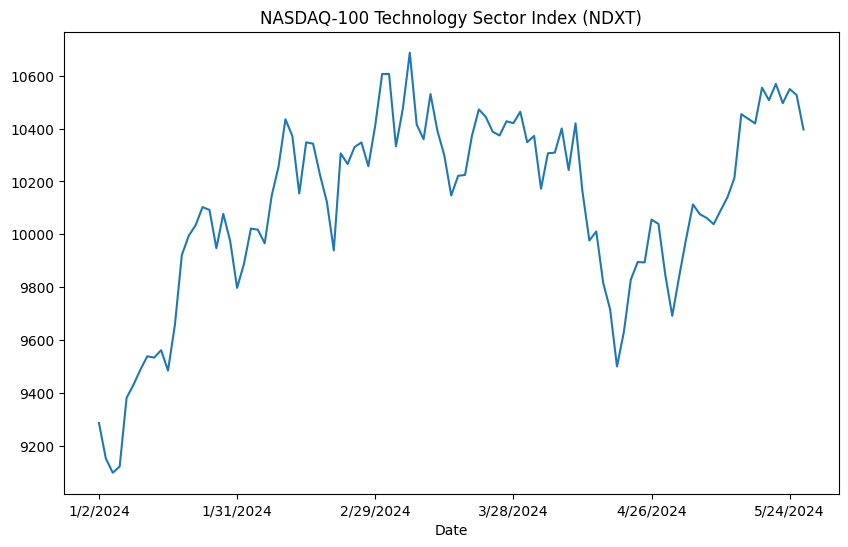

In [12]:
# Vẽ biểu đồ dữ liệu thời gian
data.plot(figsize=(10, 6))
plt.title('NASDAQ-100 Technology Sector Index (NDXT)')
plt.show()

Chuẩn hóa Ln

In [13]:
train_data_pretransform, test_data_pretransform = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [14]:
import numpy as np

In [15]:
data_ln = pd.DataFrame()
data_ln['transform'] = np.log(data)
data_ln.head()

,transform
Date,
1/2/2024,9.136369
1/3/2024,9.121781
1/4/2024,9.115910
1/5/2024,9.118474
1/8/2024,9.146553


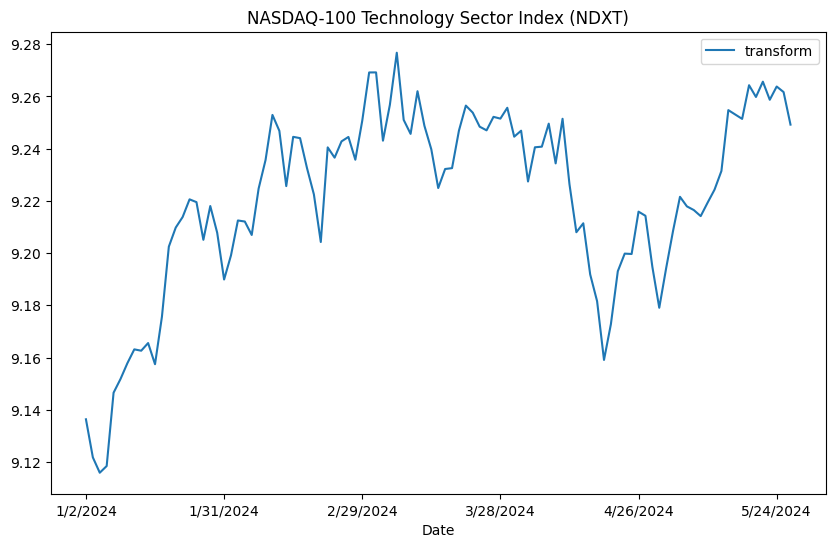

In [16]:
data_ln.plot(figsize=(10, 6))
plt.title('NASDAQ-100 Technology Sector Index (NDXT)')
plt.show()

In [17]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data, test_data = data_ln[:int(len(data)*0.95)], data_ln[int(len(data)*0.95):]

In [18]:
print(train_data)

           transform
Date                
1/2/2024    9.136369
1/3/2024    9.121781
1/4/2024    9.115910
1/5/2024    9.118474
1/8/2024    9.146553
...              ...
5/14/2024   9.231464
5/15/2024   9.254768
5/16/2024   9.253089
5/17/2024   9.251415
5/20/2024   9.264309

[97 rows x 1 columns]


In [19]:
print(test_data)

           transform
Date                
5/21/2024   9.259806
5/22/2024   9.265662
5/23/2024   9.258732
5/24/2024   9.263807
5/28/2024   9.261684
5/29/2024   9.249215


In [20]:
# Kiểm tra tính dừng của chuỗi thời gian
result = adfuller(train_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
  print("Chuỗi không có tính dừng")
else:
  print("Chuỗi có tính dừng")

ADF Statistic: -2.3940886411088296
p-value: 0.14341180197444076
Chuỗi không có tính dừng


In [21]:
#Nếu chuỗi không dừng, chạy lệnh này
p_value = 1
data_diff = pd.Series(train_data['transform'])
i = 0
while p_value > 0.05 and i < 10:
  data_diff = data_diff.diff().dropna()
  result = adfuller(data_diff)
  p_value = result[1]
  i += 1
print(p_value, i)

1.547141657001509e-12 1


In [22]:
#Nếu chuỗi dừng thì chạy lệnh này
data_diff = data

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

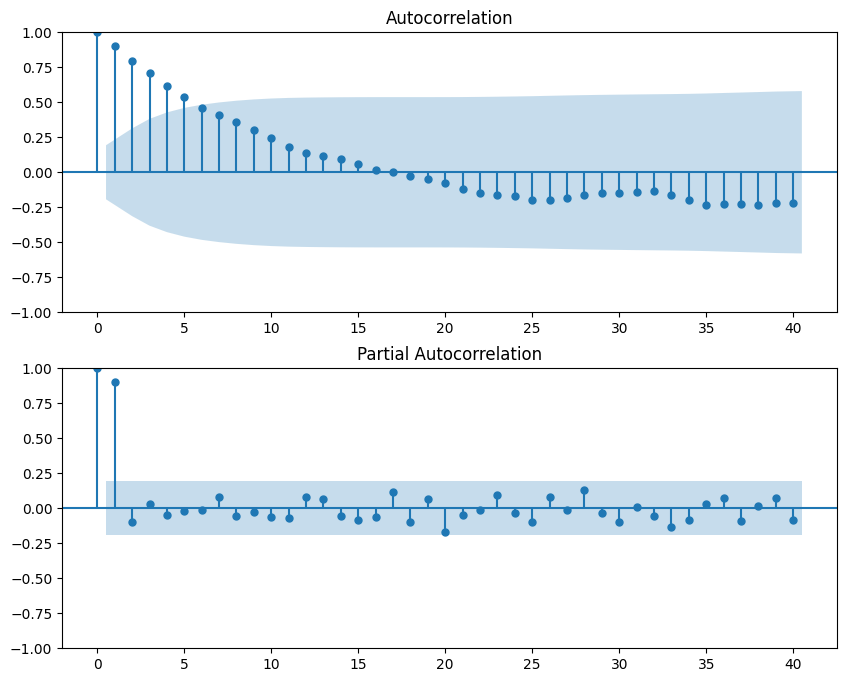

In [24]:
# Vẽ biểu đồ ACF và PACF
fig, ax = plt.subplots(2, figsize=(10, 8))
plot_acf(data_diff, lags=40, ax=ax[0])
plot_pacf(data_diff, lags=40, ax=ax[1])
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np


In [26]:
# p_optimal = 0
# q_optimal = 0
# aicc_min = 10000
# for p in range(10):
#   for q in range(10):
#     model = ARIMA(train_data, order = (p,1,q))
#     model_fit = model.fit()
#     aic = model_fit.aic
#     n = len(train_data)
#     aicc = aic + 2 * p * (p + 1) / (n - p - 1)
#     if aicc < aicc_min:
#       aicc_min = aicc
#       p_optimal = p
#       q_optimal = q
# print(p_optimal)
# print(q_optimal)

In [27]:
# Huấn luyện mô hình ARIMA với tham số đã chọn
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()
forecast = model_fit.fittedvalues
Y = train_data
X = forecast
# Thêm một cột hằng số để ước lượng intercept
X = sm.add_constant(X)

# Ước lượng mô hình OLS
ols_model = OLS(Y, X).fit()

ols_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              transform   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     7.493
Date:                Sun, 02 Jun 2024   Prob (F-statistic):            0.00740
Time:                        05:54:04   Log-Likelihood:                 190.01
No. Observations:                  97   AIC:                            -376.0
Df Residuals:                      95   BIC:                            -370.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1247      0.034    264.831      0.000       9.056       9.193
0              0.0103      0.004      2.737      0.007       0.003       0.018
==============================================================================
Omnibus:                       16.054   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.197
Skew:                          -1.005   Prob(JB):                     0.000112
Kurtosis:                       3.681   Cond. No.                         91.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Kiểm định các thứ...

Kiểm định Biến Bỏ Sót (Ljung-Box Q-Test)

p-value ≤ 0.05, có tự tương quan trong phần dư, ngụ ý rằng mô hình có thể có biến bỏ sót.

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [29]:
# Lấy phần dư của mô hình
residuals = model_fit.resid

# Kiểm định Ljung-Box Q-test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
lb_test

,lb_stat,lb_pvalue
10,0.00177,1.0


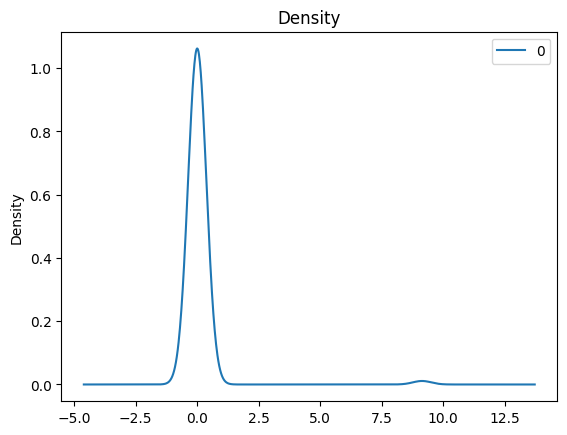

In [30]:
residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density')
plt.show()

Kiểm định Tính Tự Tương Quan Bằng Kiểm Định Nhân Tử Lagrange (LM Test)

p-value ≤ 0.05, có tự tương quan trong phần dư, ngụ ý rằng mô hình cần được xem xét lại.

In [31]:
from statsmodels.stats.diagnostic import acorr_lm

# Kiểm định LM
lm_test = acorr_lm(residuals, nlags=10)
print(f'LM Test Statistic: {lm_test[0]}, p-value: {lm_test[1]}')

LM Test Statistic: 5.637045575970516, p-value: 0.8447799475670226


#Dự đoán

In [32]:
# Dự đoán giá trên tập kiểm tra
predictions = []

# Thực hiện rolling forecast
history = train_data.values.tolist()

for t in range(len(test_data)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps = 1)
    yhat = forecast[0]
    predictions.append(yhat)
    history.append([yhat])


# Chuyển predictions thành Series để so sánh với test_data
predictions = pd.Series(predictions, index=test_data.index)


In [33]:
predictions

Date
5/21/2024    9.264349
5/22/2024    9.264349
5/23/2024    9.264349
5/24/2024    9.264349
5/28/2024    9.264349
5/29/2024    9.264349
dtype: float64

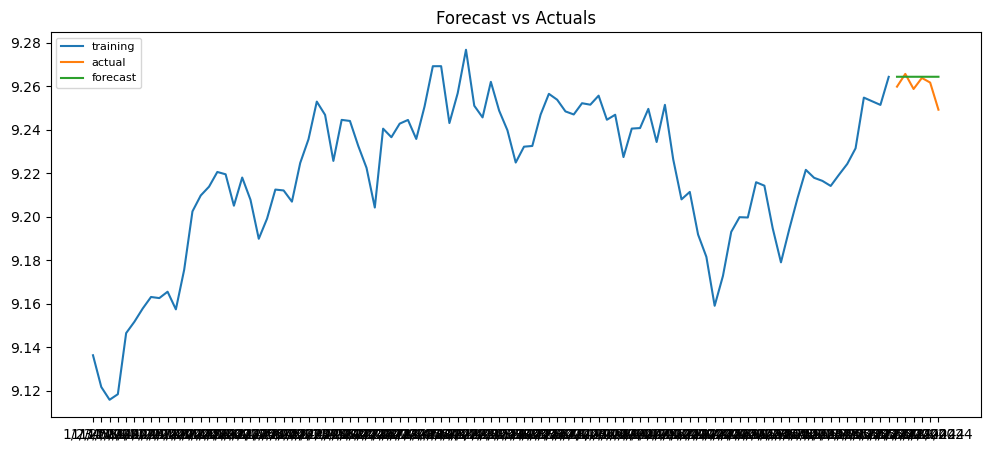

In [34]:

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(predictions, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series,
                #  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
# test_data.to_csv('/content/drive/MyDrive/test_stocks.csv', index = False)

In [36]:
# Tính toán MSE và RMSE, MAPE
mse = mean_squared_error(np.exp(test_data['transform']), np.exp(predictions))
rmse = np.sqrt(mse)
mape = (np.sum(np.abs(np.exp(predictions) - np.exp(test_data['transform'])) / np.exp(test_data['transform'])) / len(np.exp(predictions)))
# np.mean(np.abs((np.exp(test_data['transform']) - np.exp(predictions))) / np.exp(predictions)) * 100

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 5321.556468844813
RMSE: 72.94899909419466
MAPE: 0.004992522401227584


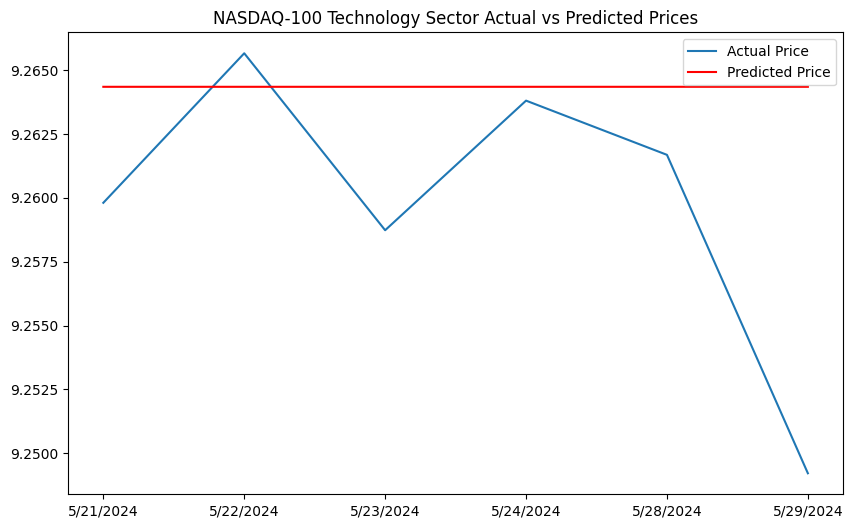

In [37]:
# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
plt.plot(test_data['transform'], label='Actual Price')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('NASDAQ-100 Technology Sector Actual vs Predicted Prices')
plt.legend()
plt.show()
